In [1]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork

### Data loading

In [2]:
data_step_train = pd.read_csv("dane_nn3/steps-large-training.csv")
data_step_train = data_step_train.drop(data_step_train.columns[0], axis=1)
data_step_train.head()
X_step_train = data_step_train['x'].values.reshape(-1, 1)
y_step_train = data_step_train['y'].values.reshape(-1, 1)

data_step_test = pd.read_csv("dane_nn3/steps-large-test.csv")
data_step_test = data_step_test.drop(data_step_test.columns[0], axis=1)
X_step_test = data_step_test['x'].values.reshape(-1, 1)
y_step_test = data_step_test['y'].values.reshape(-1, 1)

data_square_train = pd.read_csv("dane_nn3/square-large-training.csv")
data_square_train = data_square_train.drop(data_square_train.columns[0], axis=1)
data_square_train.head()
X_square_train = data_square_train['x'].values.reshape(-1, 1)
y_square_train = data_square_train['y'].values.reshape(-1, 1)

data_square_test = pd.read_csv("dane_nn3/square-large-test.csv")
data_square_test = data_square_test.drop(data_square_test.columns[0], axis=1)
data_square_test.head()
X_square_test = data_square_test['x'].values.reshape(-1, 1)
y_square_test = data_square_test['y'].values.reshape(-1, 1)

multimodal_train = pd.read_csv("dane_nn3/multimodal-large-training.csv")
multimodal_train.head()
X_multimodal_train = multimodal_train['x'].values.reshape(-1, 1)
y_multimodal_train = multimodal_train['y'].values.reshape(-1, 1)

multimodal_test = pd.read_csv("dane_nn3/multimodal-large-test.csv")
multimodal_test.head()
X_multimodal_test = multimodal_test['x'].values.reshape(-1, 1)
y_multimodal_test = multimodal_test['y'].values.reshape(-1, 1)

### Steps large dataset

In [73]:
nn_step = NeuralNetwork(X_step_train, y_step_train, [1, 16, 16, 1], activation_fun='relu')

history_step = nn_step.train(learning_rate=0.001, epochs=int(1e3), validation_data=(X_step_test, y_step_test), report_interval=100)
history_step = nn_step.train(learning_rate=0.001, epochs=int(1e3), validation_data=(X_step_test, y_step_test), report_interval=100)


Starting MSE: 7355.25
Epoch 0, Train MSE: 7350.37, Val MSE: 7424.30
Epoch 100, Train MSE: 6670.89, Val MSE: 6737.81
Epoch 200, Train MSE: 5524.92, Val MSE: 5574.43
Epoch 300, Train MSE: 4236.79, Val MSE: 4268.64
Epoch 400, Train MSE: 2990.27, Val MSE: 3012.76
Epoch 500, Train MSE: 1840.00, Val MSE: 1848.28
Epoch 600, Train MSE: 883.21, Val MSE: 888.91
Epoch 700, Train MSE: 454.86, Val MSE: 462.40
Epoch 800, Train MSE: 442.03, Val MSE: 449.36
Epoch 900, Train MSE: 441.80, Val MSE: 449.14
Training complete. Final loss: 448.9994
Starting MSE: 441.64
Epoch 1000, Train MSE: 441.64, Val MSE: 449.00
Epoch 1100, Train MSE: 441.52, Val MSE: 448.88
Epoch 1200, Train MSE: 441.41, Val MSE: 448.78
Epoch 1300, Train MSE: 441.32, Val MSE: 448.69
Epoch 1400, Train MSE: 441.23, Val MSE: 448.61
Epoch 1500, Train MSE: 441.15, Val MSE: 448.53
Epoch 1600, Train MSE: 441.08, Val MSE: 448.46
Epoch 1700, Train MSE: 441.01, Val MSE: 448.39
Epoch 1800, Train MSE: 440.94, Val MSE: 448.33
Epoch 1900, Train MSE: 4

In [78]:
nn_step_batch = NeuralNetwork(X_step_train, y_step_train, [1, 32, 64, 32, 1], activation_fun='relu')

history_step_batch = nn_step_batch.train(learning_rate=0.001, epochs=int(500), validation_data=(X_step_test, y_step_test), mini_batch=True, batch_size=50, stop_condition=1, report_interval=100)
history_step_batch = nn_step_batch.train(learning_rate=0.0002, epochs=int(500), validation_data=(X_step_test, y_step_test), mini_batch=True, batch_size=50, stop_condition=1, report_interval=100)

Starting MSE: 7417.42
Epoch 0, Train MSE: 4829.24, Val MSE: 4873.72
Epoch 100, Train MSE: 437.60, Val MSE: 443.87
Epoch 200, Train MSE: 396.33, Val MSE: 403.07
Epoch 300, Train MSE: 373.47, Val MSE: 379.10
Epoch 400, Train MSE: 299.51, Val MSE: 298.13
Training complete. Final loss: 131.2851
Starting MSE: 143.87
Epoch 500, Train MSE: 129.73, Val MSE: 130.71
Epoch 600, Train MSE: 113.40, Val MSE: 114.57
Epoch 700, Train MSE: 104.03, Val MSE: 107.15
Epoch 800, Train MSE: 92.74, Val MSE: 93.48
Epoch 900, Train MSE: 91.26, Val MSE: 97.98
Training complete. Final loss: 77.1346


Full dataset MSE:  336.28888507421976
Mini-batch MSE:  8.550690993180284


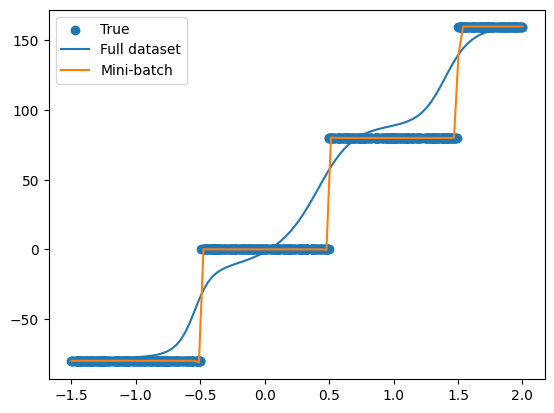

In [41]:
y_pred = nn_step.predict(X_step_test)
y_pred_batch = nn_step_batch.predict(X_step_test)

print("Full dataset MSE: ", np.mean((y_step_test - y_pred) ** 2))
print("Mini-batch MSE: ", np.mean((y_step_test - y_pred_batch) ** 2))

x = np.linspace(min(X_step_test), max(X_step_test), 100).reshape(-1, 1)

plt.scatter(X_step_test, y_step_test, label="True")
plt.plot(x, nn_step.predict(x), label="Full dataset")
plt.plot(x, nn_step_batch.predict(x), label="Mini-batch")
plt.legend()
plt.show()

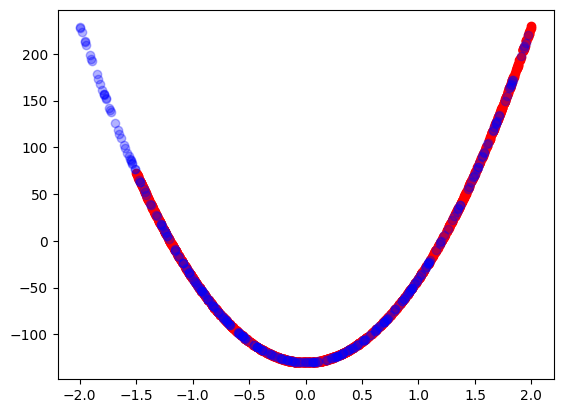

In [16]:
plt.scatter(X_square_train, y_square_train, color='red')
plt.scatter(X_square_test, y_square_test, alpha=0.3, color='blue')
plt.show()

In [3]:
nn_square = NeuralNetwork(X_square_train,y_square_train, [1, 32, 64, 32, 1], activation_fun='sigmoid')

history = nn_square.train(learning_rate=0.1, epochs=int(1e3), validation_data=(X_square_test, y_square_test), report_interval=100)


Starting MSE: 9771.20
Epoch 0, Train MSE: 9542.51, Val MSE: 10658.64
Epoch 100, Train MSE: 6369.08, Val MSE: 11470.39
Epoch 200, Train MSE: 4381.48, Val MSE: 8837.53
Epoch 300, Train MSE: 4339.02, Val MSE: 8862.62
Epoch 400, Train MSE: 4405.17, Val MSE: 8893.93
Epoch 500, Train MSE: 4551.07, Val MSE: 9103.35
Epoch 600, Train MSE: 5391.07, Val MSE: 9545.53
Added noise to enable escape from local minimum or plateau
Epoch 700, Train MSE: 4161.80, Val MSE: 8763.96
Epoch 800, Train MSE: 4368.94, Val MSE: 8936.09
Epoch 900, Train MSE: 4614.04, Val MSE: 8933.39
Training complete. Final loss: 8135.4203


In [3]:
nn_square_batch = NeuralNetwork(X_square_train,y_square_train, [1, 200, 1], activation_fun='sigmoid')

history_square_batch = nn_square_batch.train(learning_rate=0.01, epochs=int(1e4), validation_data=(X_square_test, y_square_test)
                                             , mini_batch=True, batch_size=200, momentum=0.3, report_interval=100)
history_square_batch = nn_square_batch.train(learning_rate=0.006, epochs=int(1e4), validation_data=(X_square_test, y_square_test),
                                              mini_batch=True, batch_size=200, momentum=0.5, report_interval=10)
history_square_batch = nn_square_batch.train(learning_rate=0.004, epochs=int(1e4), validation_data=(X_square_test, y_square_test),
                                              mini_batch=True, batch_size=200, momentum=0.7, report_interval=10)
history_square_batch = nn_square_batch.train(learning_rate=0.002, epochs=int(1e4), validation_data=(X_square_test, y_square_test),
                                              mini_batch=True, batch_size=200, momentum=0.7, report_interval=10)


Starting MSE: 9774.01
Epoch 0, Train MSE: 9630.77, Val MSE: 10715.28
Epoch 100, Train MSE: 4055.71, Val MSE: 8581.89
Epoch 200, Train MSE: 3580.14, Val MSE: 7914.01
Epoch 300, Train MSE: 3358.34, Val MSE: 7687.09
Epoch 400, Train MSE: 3302.68, Val MSE: 7614.33
Epoch 500, Train MSE: 3271.18, Val MSE: 7600.29
Epoch 600, Train MSE: 3249.43, Val MSE: 7532.29
Epoch 700, Train MSE: 3174.59, Val MSE: 7433.53
Epoch 800, Train MSE: 3131.21, Val MSE: 7406.38
Epoch 900, Train MSE: 3083.11, Val MSE: 7431.02
Epoch 1000, Train MSE: 3063.48, Val MSE: 7311.80
Epoch 1100, Train MSE: 3020.24, Val MSE: 7269.60
Epoch 1200, Train MSE: 2990.65, Val MSE: 7230.01
Epoch 1300, Train MSE: 2958.86, Val MSE: 7173.27
Epoch 1400, Train MSE: 2952.41, Val MSE: 7157.19
Epoch 1500, Train MSE: 2965.39, Val MSE: 7180.49
Epoch 1600, Train MSE: 2932.58, Val MSE: 7085.88
Epoch 1700, Train MSE: 2860.14, Val MSE: 7033.74
Epoch 1800, Train MSE: 2891.93, Val MSE: 7140.39
Epoch 1900, Train MSE: 2813.94, Val MSE: 7010.79
Epoch 200

: 

MSE for full:  9829.660927035535
MSE for mini-batch:  475.18706817576293


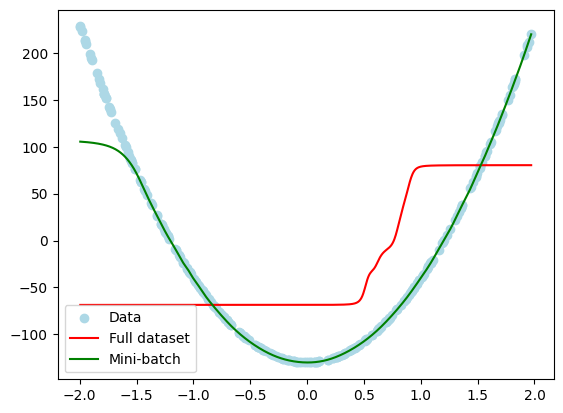

In [6]:
y_square_pred = nn_square.predict(X_square_test)
mse_square = np.mean(np.square(y_square_test - y_square_pred))
print("MSE for full: ", mse_square)

y_square_pred2 = nn_square_batch.predict(X_square_test)
mse_square2 = np.mean(np.square(y_square_test - y_square_pred2))
print("MSE for mini-batch: ", mse_square2)

x = np.linspace(min(X_square_test), max(X_square_test), 1000)
plt.scatter(X_square_test, y_square_test, color='lightblue', label='Data')
plt.plot(x, nn_square.predict(x), color='red', label='Full dataset')
plt.plot(x, nn_square_batch.predict(x), color='green', label='Mini-batch')
plt.legend()
plt.show()